In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 


fatal_accident = pd.read_csv('fatalaccidentdata.csv')
fatal_casual = pd.read_csv('fatalcasualtydata.csv')
fatal_data = pd.merge(fatal_accident, fatal_casual, on='Fatal_Accident_Index')
fatal_data.reset_index(inplace=True)
fatal_data

,index,Fatal_Accident_Index,Month_of_Accident,Hour_of_Accident,Longitude,Latitude,Pedestrian_Casualties,Pedal_Cycles,Motor_Cycles,Cars,...,HGVs,Other_Vehicles,Total_Vehicles_Involved,Fatal_Casualties,Serious_Casualties,Slight_Casualties,Total_Number_of_Casualties,Fatal_Casualty_Type,Fatal_Casualty_Sex,Fatal_Casualty_Age
0,0,200601CP00117,May,16,-0.088176,51.509763,1,0,1,1,...,0,0,2,1,0,0,1,Pedestrian,Male,33
1,1,200601TA00014,January,22,-0.130332,51.507925,1,0,0,0,...,0,0,1,1,0,1,2,Pedestrian,Male,64
2,2,200601TA00032,February,9,-0.067844,51.574718,1,0,0,1,...,0,0,1,1,0,0,1,Pedestrian,Male,2
3,3,200601TA00055,January,16,-0.082726,51.577749,0,0,1,1,...,0,0,2,1,0,0,1,Motor_Cycle_Rider,Male,41
4,4,200601TA00075,April,7,-0.141247,51.537145,0,0,1,1,...,0,0,2,1,0,0,1,Motor_Cycle_Rider,Male,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,8651,2008983139108,July,13,-3.489275,55.061641,0,0,1,1,...,1,0,3,1,0,0,1,Motor_Cycle_Rider,Male,28
8652,8652,2008983165108,December,9,-3.880791,55.216025,0,0,0,1,...,0,0,1,1,0,0,1,Car_Driver,Female,49
8653,8653,2008984128508,July,17,-3.234518,54.985315,0,0,0,1,...,0,1,2,1,0,0,1,Other_Vehicle_Occupant,Male,24
8654,8654,2008984134408,September,14,-3.101761,54.993959,0,0,0,3,...,0,0,3,2,2,5,9,Car_Driver,Male,84


In [2]:
lsoa = pd.concat([pd.read_csv('lsoa-partial-convert.csv'),pd.read_csv('lsoa-partial-convert-others.csv')])
lsoa.reset_index(inplace=True)
lsoa

,level_0,index,lsoacd,lsoanm
0,0,0,0,0
1,1,1,0,0
2,2,2,0,0
3,3,3,0,0
4,4,4,E01000868,Camden 015D
...,...,...,...,...
8651,3491,8651,NaN,NaN
8652,3492,8652,NaN,NaN
8653,3493,8653,NaN,NaN
8654,3494,8654,NaN,NaN


In [3]:
fatal_data_merge = pd.merge(fatal_data,lsoa[["index","lsoacd","lsoanm"]], on='index')
fatal_data_merge.to_csv('data.csv')
fatal_data_merge

,index,Fatal_Accident_Index,Month_of_Accident,Hour_of_Accident,Longitude,Latitude,Pedestrian_Casualties,Pedal_Cycles,Motor_Cycles,Cars,...,Total_Vehicles_Involved,Fatal_Casualties,Serious_Casualties,Slight_Casualties,Total_Number_of_Casualties,Fatal_Casualty_Type,Fatal_Casualty_Sex,Fatal_Casualty_Age,lsoacd,lsoanm
0,0,200601CP00117,May,16,-0.088176,51.509763,1,0,1,1,...,2,1,0,0,1,Pedestrian,Male,33,0,0
1,1,200601TA00014,January,22,-0.130332,51.507925,1,0,0,0,...,1,1,0,1,2,Pedestrian,Male,64,0,0
2,2,200601TA00032,February,9,-0.067844,51.574718,1,0,0,1,...,1,1,0,0,1,Pedestrian,Male,2,0,0
3,3,200601TA00055,January,16,-0.082726,51.577749,0,0,1,1,...,2,1,0,0,1,Motor_Cycle_Rider,Male,41,0,0
4,4,200601TA00075,April,7,-0.141247,51.537145,0,0,1,1,...,2,1,0,0,1,Motor_Cycle_Rider,Male,30,E01000868,Camden 015D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,8651,2008983139108,July,13,-3.489275,55.061641,0,0,1,1,...,3,1,0,0,1,Motor_Cycle_Rider,Male,28,NaN,NaN
8652,8652,2008983165108,December,9,-3.880791,55.216025,0,0,0,1,...,1,1,0,0,1,Car_Driver,Female,49,NaN,NaN
8653,8653,2008984128508,July,17,-3.234518,54.985315,0,0,0,1,...,2,1,0,0,1,Other_Vehicle_Occupant,Male,24,NaN,NaN
8654,8654,2008984134408,September,14,-3.101761,54.993959,0,0,0,3,...,3,2,2,5,9,Car_Driver,Male,84,NaN,NaN


In [4]:
fatal_data_merge["year"] = fatal_data_merge["Fatal_Accident_Index"].apply(lambda r: r[:4])
fatal_data_merge["Fatal_Casualties_Rate"] = fatal_data_merge["Fatal_Casualties"] / fatal_data_merge["Total_Number_of_Casualties"]
fatal_data_merge["Fatal_Casualty_Age_Num"] = pd.to_numeric(fatal_data_merge["Fatal_Casualty_Age"],errors='coerce')
fatal_data_merge['Fatal_Casualty_Sex'] = fatal_data_merge['Fatal_Casualty_Sex'].replace({'Not_Reported': np.nan})

fatal_data_merge = fatal_data_merge.dropna(subset=['Fatal_Casualty_Age_Num','Fatal_Casualty_Sex'])
fatal_data_merge = fatal_data_merge[fatal_data_merge['Fatal_Casualty_Age_Num']>0]
fatal_data_merge["Fatal_Casualty_Age_bins"] = pd.cut(fatal_data_merge["Fatal_Casualty_Age_Num"],bins=[0,6,10,14,19,24,200],labels=[0,1,2,3,4,5])
fatal_data_merge = fatal_data_merge.reset_index()
fatal_data_merge[:1]

,level_0,index,Fatal_Accident_Index,Month_of_Accident,Hour_of_Accident,Longitude,Latitude,Pedestrian_Casualties,Pedal_Cycles,Motor_Cycles,...,Total_Number_of_Casualties,Fatal_Casualty_Type,Fatal_Casualty_Sex,Fatal_Casualty_Age,lsoacd,lsoanm,year,Fatal_Casualties_Rate,Fatal_Casualty_Age_Num,Fatal_Casualty_Age_bins
0,0,0,200601CP00117,May,16,-0.088176,51.509763,1,0,1,...,1,Pedestrian,Male,33,0,0,2006,1.0,33.0,5


In [5]:
oneHotEncoder = OneHotEncoder(sparse=False)
enc_df = pd.DataFrame(oneHotEncoder.fit_transform(fatal_data_merge[['Fatal_Casualty_Sex']]),columns=["Fatal_Casualty_Sex0","Fatal_Casualty_Sex1"])
fatal_data_merge = pd.concat([fatal_data_merge, enc_df], axis=1, sort=False)
fatal_data_merge

,level_0,index,Fatal_Accident_Index,Month_of_Accident,Hour_of_Accident,Longitude,Latitude,Pedestrian_Casualties,Pedal_Cycles,Motor_Cycles,...,Fatal_Casualty_Sex,Fatal_Casualty_Age,lsoacd,lsoanm,year,Fatal_Casualties_Rate,Fatal_Casualty_Age_Num,Fatal_Casualty_Age_bins,Fatal_Casualty_Sex0,Fatal_Casualty_Sex1
0,0,0,200601CP00117,May,16,-0.088176,51.509763,1,0,1,...,Male,33,0,0,2006,1.000000,33.0,5,0.0,1.0
1,1,1,200601TA00014,January,22,-0.130332,51.507925,1,0,0,...,Male,64,0,0,2006,0.500000,64.0,5,0.0,1.0
2,2,2,200601TA00032,February,9,-0.067844,51.574718,1,0,0,...,Male,2,0,0,2006,1.000000,2.0,0,0.0,1.0
3,3,3,200601TA00055,January,16,-0.082726,51.577749,0,0,1,...,Male,41,0,0,2006,1.000000,41.0,5,0.0,1.0
4,4,4,200601TA00075,April,7,-0.141247,51.537145,0,0,1,...,Male,30,E01000868,Camden 015D,2006,1.000000,30.0,5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,8651,8651,2008983139108,July,13,-3.489275,55.061641,0,0,1,...,Male,28,NaN,NaN,2008,1.000000,28.0,5,0.0,1.0
8623,8652,8652,2008983165108,December,9,-3.880791,55.216025,0,0,0,...,Female,49,NaN,NaN,2008,1.000000,49.0,5,1.0,0.0
8624,8653,8653,2008984128508,July,17,-3.234518,54.985315,0,0,0,...,Male,24,NaN,NaN,2008,1.000000,24.0,4,0.0,1.0
8625,8654,8654,2008984134408,September,14,-3.101761,54.993959,0,0,0,...,Male,84,NaN,NaN,2008,0.222222,84.0,5,0.0,1.0


In [6]:
fatal_data_filter = fatal_data_merge[["lsoacd","lsoanm","year","Fatal_Casualties_Rate","Fatal_Casualty_Age_bins","Fatal_Casualty_Sex1"]]
fatal_data_filter

,lsoacd,lsoanm,year,Fatal_Casualties_Rate,Fatal_Casualty_Age_bins,Fatal_Casualty_Sex1
0,0,0,2006,1.000000,5,1.0
1,0,0,2006,0.500000,5,1.0
2,0,0,2006,1.000000,0,1.0
3,0,0,2006,1.000000,5,1.0
4,E01000868,Camden 015D,2006,1.000000,5,1.0
...,...,...,...,...,...,...
8622,NaN,NaN,2008,1.000000,5,1.0
8623,NaN,NaN,2008,1.000000,5,0.0
8624,NaN,NaN,2008,1.000000,4,1.0
8625,NaN,NaN,2008,0.222222,5,1.0


In [7]:
import os
import pandas as pd
lsoa_files = [os.path.join('LOSA',file) for file in os.listdir('LOSA') if file.endswith('.csv')]
lsoa_data = None
for index,file in enumerate(lsoa_files):
    print("---------%s--------"%(file))
    df_tmp = pd.read_csv(file)
    col_filter = ['date', 'geography', 'geography code']+[col for col in df_tmp.columns if '16 to 24' in col or '16 and over' in col ]

    if lsoa_data is None:
        lsoa_data = df_tmp[col_filter]
    lsoa_data = pd.merge(lsoa_data,df_tmp[col_filter], on=['date', 'geography', 'geography code'], how='inner')
    print(len(lsoa_data.columns))

lsoa_data[:1]

---------LOSA/Distance travelled to work by age (LSOA).csv--------
27
---------LOSA/Method of travel to work (2001 specification) by age (LSOA).csv--------
37
---------LOSA/Religion by Sex&Age (LSOA).csv--------
67
---------LOSA/Hours Worked by Sex (LSOA).csv--------
67
---------LOSA/Occupation by Age (LSOA).csv--------
87
---------LOSA/Car or van availability by Sex&Age (LSOA).csv--------
99
---------LOSA/Ethnic group by Sex&Age (LSOA).csv--------
99
---------LOSA/Hours Worked by Age (LSOA).csv--------
113
---------LOSA/Econmic Activities by Sex&Age (LSOA).csv--------
179
---------LOSA/NS-SeC by Age (LSOA).csv--------
199


,date,geography,geography code,Age: All categories: Age 16 and over; Distance travelled to work: All categories: Distance travelled to work; measures: Value_x,Age: All categories: Age 16 and over; Distance travelled to work: Less than 10km; measures: Value_x,Age: All categories: Age 16 and over; Distance travelled to work: 10km to less than 30km; measures: Value_x,Age: All categories: Age 16 and over; Distance travelled to work: 30km and over; measures: Value_x,Age: All categories: Age 16 and over; Distance travelled to work: Work mainly at or from home; measures: Value_x,Age: All categories: Age 16 and over; Distance travelled to work: Other; measures: Value_x,Age: Age 16 to 24; Distance travelled to work: All categories: Distance travelled to work; measures: Value_x,...,NS-SeC: 5. Lower supervisory and technical occupations; Age: All categories: Age 16 and over; measures: Value,NS-SeC: 5. Lower supervisory and technical occupations; Age: Age 16 to 24; measures: Value,NS-SeC: 6. Semi-routine occupations; Age: All categories: Age 16 and over; measures: Value,NS-SeC: 6. Semi-routine occupations; Age: Age 16 to 24; measures: Value,NS-SeC: 7. Routine occupations; Age: All categories: Age 16 and over; measures: Value,NS-SeC: 7. Routine occupations; Age: Age 16 to 24; measures: Value,NS-SeC: 8. Never worked and long-term unemployed; Age: All categories: Age 16 and over; measures: Value,NS-SeC: 8. Never worked and long-term unemployed; Age: Age 16 to 24; measures: Value,NS-SeC: L15 Full-time students; Age: All categories: Age 16 and over; measures: Value,NS-SeC: L15 Full-time students; Age: Age 16 to 24; measures: Value
0,2011,Darlington 001B,E01012334,1320,507,325,149,248,91,100,...,88,7,172,19,108,20,48,6,81,74


In [8]:
pd.merge(fatal_data_merge,lsoa_data,  how='inner', left_on=['lsoacd'], right_on = ['geography code']).to_csv('data.csv')

In [9]:
df_final = pd.merge(fatal_data_filter,lsoa_data,  how='inner', left_on=['lsoacd'], right_on = ['geography code'])
# df_final = pd.merge(fatal_data_filter,lsoa_data,  how='inner', left_on=['year','lsoacd'], right_on = ['date',  'geography code'])
df_final

,lsoacd,lsoanm,year,Fatal_Casualties_Rate,Fatal_Casualty_Age_bins,Fatal_Casualty_Sex1,date,geography,geography code,Age: All categories: Age 16 and over; Distance travelled to work: All categories: Distance travelled to work; measures: Value_x,...,NS-SeC: 5. Lower supervisory and technical occupations; Age: All categories: Age 16 and over; measures: Value,NS-SeC: 5. Lower supervisory and technical occupations; Age: Age 16 to 24; measures: Value,NS-SeC: 6. Semi-routine occupations; Age: All categories: Age 16 and over; measures: Value,NS-SeC: 6. Semi-routine occupations; Age: Age 16 to 24; measures: Value,NS-SeC: 7. Routine occupations; Age: All categories: Age 16 and over; measures: Value,NS-SeC: 7. Routine occupations; Age: Age 16 to 24; measures: Value,NS-SeC: 8. Never worked and long-term unemployed; Age: All categories: Age 16 and over; measures: Value,NS-SeC: 8. Never worked and long-term unemployed; Age: Age 16 to 24; measures: Value,NS-SeC: L15 Full-time students; Age: All categories: Age 16 and over; measures: Value,NS-SeC: L15 Full-time students; Age: Age 16 to 24; measures: Value
0,E01000868,Camden 015D,2006,1.000000,5,1.0,2011,Camden 015D,E01000868,608,...,66,4,123,12,113,8,166,16,99,63
1,E01000868,Camden 015D,2007,1.000000,5,0.0,2011,Camden 015D,E01000868,608,...,66,4,123,12,113,8,166,16,99,63
2,E01002150,Harrow 006C,2006,1.000000,4,1.0,2011,Harrow 006C,E01002150,909,...,84,9,137,14,75,7,99,18,101,78
3,E01002150,Harrow 006C,2006,1.000000,5,0.0,2011,Harrow 006C,E01002150,909,...,84,9,137,14,75,7,99,18,101,78
4,E01002150,Harrow 006C,2006,0.142857,5,0.0,2011,Harrow 006C,E01002150,909,...,84,9,137,14,75,7,99,18,101,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,E01001574,Greenwich 008D,2008,1.000000,5,1.0,2011,Greenwich 008D,E01001574,632,...,108,7,233,25,151,15,192,42,111,65
4377,E01025010,Fylde 003B,2008,0.500000,4,0.0,2011,Fylde 003B,E01025010,711,...,143,10,216,24,248,33,136,18,61,49
4378,E01032259,Redditch 008A,2008,1.000000,3,0.0,2011,Redditch 008A,E01032259,747,...,89,6,177,21,106,7,85,3,64,58
4379,E01021888,Maldon 003E,2008,1.000000,5,1.0,2011,Maldon 003E,E01021888,852,...,151,18,327,48,252,21,120,20,50,40


Mean Square Error: 0.08989850901020781


<AxesSubplot:ylabel='Fatal_Casualties_Rate'>

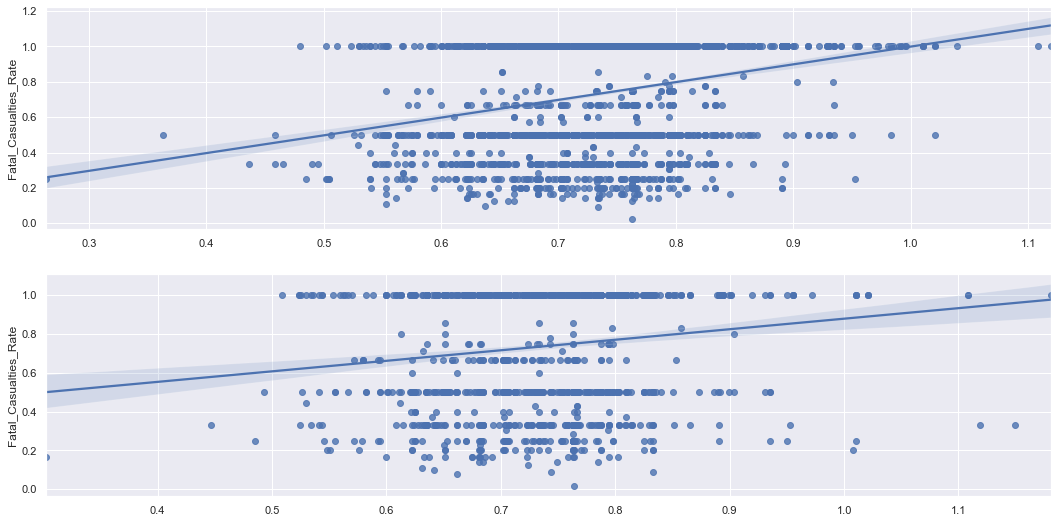

In [10]:
X_columns = [col for col in df_final.columns.tolist() if col not in ["Fatal_Casualties_Rate",'lsoacd','lsoanm','year','geography','geography code','date']]

X,y = df_final[X_columns],df_final[["Fatal_Casualties_Rate"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train,Y_train)

Y_train_pred = model.predict(X_train)
Y_lin_predict = model.predict(X_test)

print ("Mean Square Error: {}".format(mean_squared_error(Y_lin_predict,Y_test)))


fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(211)
sns.regplot(x=Y_train_pred, y=Y_train,ax = ax1)

ax2 = fig.add_subplot(212)
sns.regplot(x=Y_lin_predict, y=Y_test,ci=95,ax = ax2)

In [11]:
fatal_data_merge["year"] = fatal_data_merge["year"].astype('int')
fatal_data_merge.dtypes


level_0                          int64
index                            int64
Fatal_Accident_Index            object
Month_of_Accident               object
Hour_of_Accident                 int64
Longitude                      float64
Latitude                       float64
Pedestrian_Casualties            int64
Pedal_Cycles                     int64
Motor_Cycles                     int64
Cars                             int64
Buses_or_Coaches                 int64
Vans                             int64
HGVs                             int64
Other_Vehicles                   int64
Total_Vehicles_Involved          int64
Fatal_Casualties                 int64
Serious_Casualties               int64
Slight_Casualties                int64
Total_Number_of_Casualties       int64
Fatal_Casualty_Type             object
Fatal_Casualty_Sex              object
Fatal_Casualty_Age              object
lsoacd                          object
lsoanm                          object
year                     

In [12]:
import numpy as np
import pandas as pd
import folium
import webbrowser
from folium.plugins import HeatMap
fatal_data_merge_plot = fatal_data_merge[(fatal_data_merge["year"]>2005) & (fatal_data_merge["year"]<2009)]
num = 60
lat = np.array(fatal_data_merge["Latitude"][0:num]) 
lon = np.array(fatal_data_merge["Longitude"][0:num])   
Fatal_Casualties = np.array(fatal_data_merge["Fatal_Casualties"][0:num],dtype=float) 
data1 = [[lat[i],lon[i],Fatal_Casualties[i]] for i in range(num)] 
map_osm = folium.Map(location=[35,110],zoom_start=5)
HeatMap(data1).add_to(map_osm)
file_path = r"heatmap.html"
map_osm.save(file_path) 
webbrowser.open(file_path)

True